## Weekend Movie Trip

#### Data Source: https://grouplens.org/datasets/movielens/ small data set

#### The data are contained in the files movies.csv, ratings.csv and tags.csv.

#### This notebook is a movie recommendation model using K-means clustering and DBSCAN. The two features extracted from the dataset include: Average Movie Rating and Tags.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('../data/external/movies.csv')
ratings = pd.read_csv('../data/external/ratings.csv')
tags = pd.read_csv('../data/external/tags.csv')

## Cleaning Data

### Ratings Dataset

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings = ratings[['movieId', 'rating']]
ratings.head()

,movieId,rating
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0


In [5]:
ratings = pd.DataFrame(ratings.groupby(['movieId']).mean()['rating'])

In [6]:
ratings.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [7]:
ratings.reset_index(inplace=True)
ratings.head()

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


### Tags

In [8]:
tags = tags[[ 'movieId', 'tag']]
tags.drop_duplicates(inplace= True)
tags.head()

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell
3,89774,Boxing story
4,89774,MMA


In [9]:
tags.movieId.nunique()

1572

### Movies

In [10]:
#movies = movies.join(movies.genres.str.get_dummies()).drop(labels=['genres','title'], axis=1)
movies.shape

(9742, 3)

### Merging Datasets

In [11]:
movies_ratings = pd.merge(movies,ratings,
                       how='right', on=['movieId'])
#movies_ratings = pd.merge(movies, ratings, on='movieId')
movies_ratings.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


### Rating of each movie

In [12]:
Rating_of_movie = movies_ratings.groupby(['title','rating']).count()


### Rating vs each movie

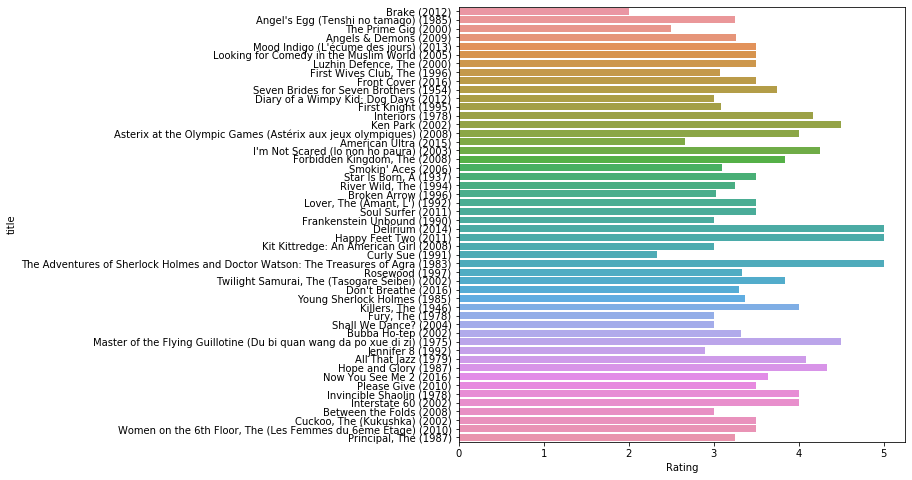

In [13]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x='rating',y='title',data=movies_ratings.sample(50))
ax.set(xlabel='Rating', ylabel='title')
plt.show()

In [14]:
movies_ratings.shape

(9724, 4)

In [15]:
movies_ratings.isnull().any()

movieId    False
title      False
genres     False
rating     False
dtype: bool

In [16]:
movies_ratings_tags=pd.merge(movies_ratings,tags,
                       how='left', on=['movieId'])

In [17]:
movies_ratings_tags.shape

(11728, 5)

In [18]:
movies_ratings_tags.head()

,movieId,title,genres,rating,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,fun
2,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,fantasy
3,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,magic board game
4,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,Robin Williams


### No of Tags in each movie

In [19]:
numberoftags = movies_ratings_tags.groupby(['title'])['tag'].nunique().sort_values(ascending= False).to_frame()
numberoftags['title'] = numberoftags.index.tolist()
numberoftags.columns = ['Number of tags','title']
numberoftags.index= np.arange(0,len(numberoftags))
numberoftags.head()

,Number of tags,title
0,173,Pulp Fiction (1994)
1,48,Fight Club (1999)
2,40,2001: A Space Odyssey (1968)
3,32,"Big Lebowski, The (1998)"
4,32,Léon: The Professional (a.k.a. The Professiona...


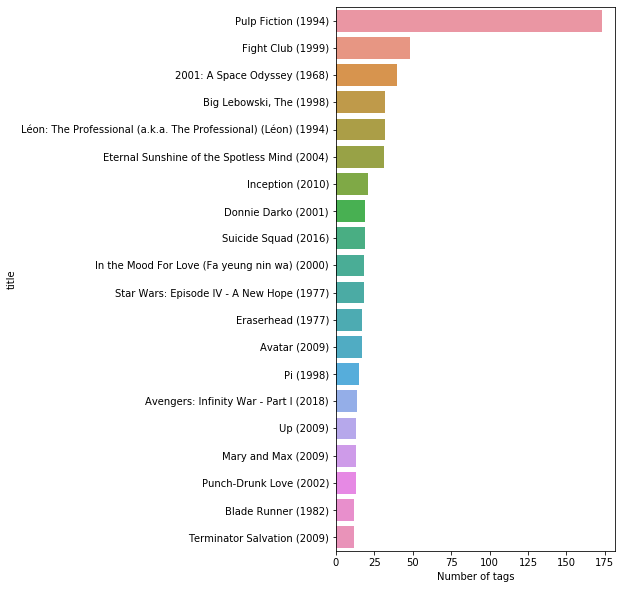

In [20]:
plt.figure(figsize=(5,10))
ax = sns.barplot(x='Number of tags',y='title',data=numberoftags.head(20))
ax.set(xlabel='Number of tags', ylabel='title')
plt.show()

In [21]:
movies_ratings_tags.isnull().any()

movieId    False
title      False
genres     False
rating     False
tag         True
dtype: bool

In [22]:
# Filling the null values with other
movies_ratings_tags['tag'] = movies_ratings_tags['tag'].fillna("Other")
movies_ratings_tags.isnull().any()

movieId    False
title      False
genres     False
rating     False
tag        False
dtype: bool

In [23]:
len(movies_ratings_tags.tag == 'other')

11728

In [24]:
print(any(movies_ratings_tags.duplicated()))

False


In [25]:
final_movies_ratings_tags=movies_ratings_tags[['movieId','rating','tag']]

In [26]:
final_movies_ratings_tags.head()

,movieId,rating,tag
0,1,3.920930,pixar
1,1,3.920930,fun
2,2,3.431818,fantasy
3,2,3.431818,magic board game
4,2,3.431818,Robin Williams


# Label Encoding

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
final_movies_ratings_tags['tag'] = number.fit_transform(final_movies_ratings_tags['tag'].astype('str'))
final_movies_ratings_tags.head(5)

,movieId,rating,tag
0,1,3.920930,1240
1,1,3.920930,931
2,2,3.431818,898
3,2,3.431818,1113
4,2,3.431818,443


In [29]:
final_movies_ratings_tags.shape

(11728, 3)

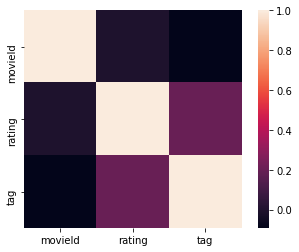

In [30]:
#check correlation between features
final_movies_ratings_tags_temp = final_movies_ratings_tags[['movieId','rating','tag']] #Subsetting the data
cor = final_movies_ratings_tags_temp.corr()
sns.heatmap(cor, square = True)

### Clustering using Kmeans

In [31]:
X=final_movies_ratings_tags[[ 'rating', 'tag']].values
X

array([[   3.92093023, 1240.        ],
       [   3.92093023,  931.        ],
       [   3.43181818,  898.        ],
       ...,
       [   3.5       ,  398.        ],
       [   3.5       ,  398.        ],
       [   4.        ,  398.        ]])

In [32]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

### Calculating the best k value using elbow method

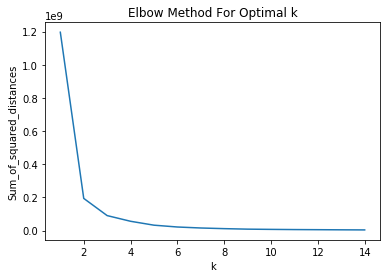

In [33]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
#visualizing the clusters
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

#### Taking the number of clusters as 5

#### The centroid of the cluster is denoted in Black color for each cluster.
#### Number of clusters chosen based on the plot above: 5¶

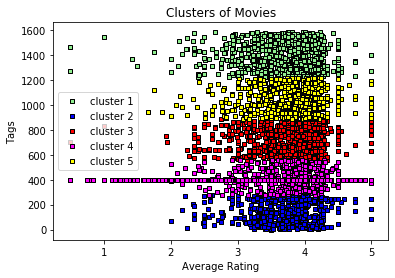

In [35]:
# plot the 6 clusters
#data_transformed=data_transformed.value
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=10, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=10, c='blue', marker='s', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=10, c='red', marker='s', edgecolor='black', label='cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=10, c='magenta', marker='s', edgecolor='black', label='cluster 4')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s=10, c='yellow', marker='s', edgecolor='black', label='cluster 5')
#plt.scatter(X[y_km == 5, 0], X[y_km == 5, 1], s=10, c='purple', marker='s', edgecolor='black', label='cluster 6')
#plt.legend(scatterpoints=1)
plt.title('Clusters of Movies')
plt.xlabel('Average Rating')
plt.ylabel('Tags')
plt.legend()
plt.show()

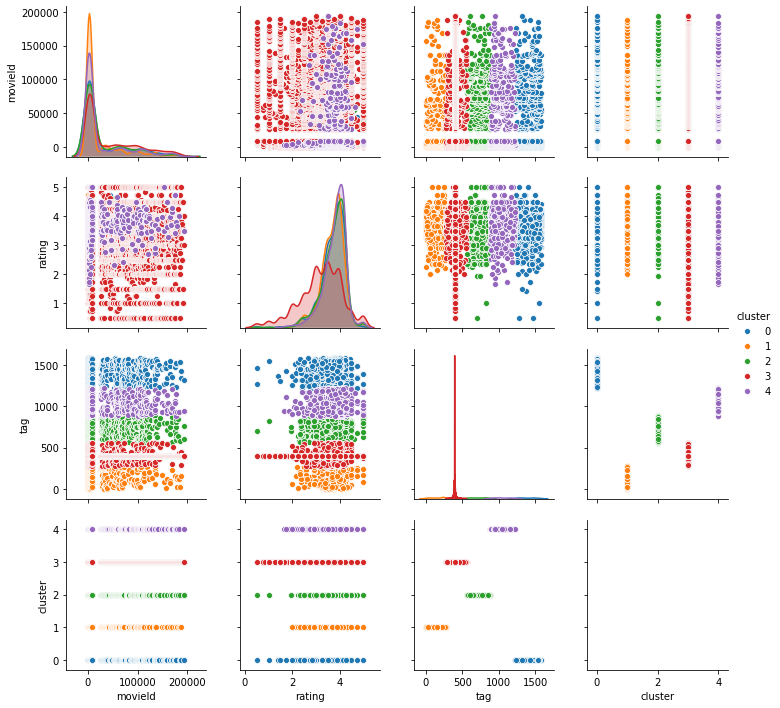

In [36]:
final_movies_ratings_tags['cluster'] = y_km
cols = list(final_movies_ratings_tags.columns)
#cols.remove('movieId')
sns.pairplot( final_movies_ratings_tags[ cols ], hue="cluster")

In [37]:
#visualizing the clusters
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [38]:
row_dict = []
for index, row in movies_ratings_tags.iterrows():
        row_dict.append(row['title'])


In [39]:
#find the clusters        
clusternames = km.predict(X)
print(clusternames)
clusters = {}
n = 0
for moviename in clusternames:
    if moviename in clusters:
        if(row_dict[n] not in clusters[moviename]):
            clusters[moviename].append(row_dict[n])
    else:
        clusters[moviename] = [row_dict[n]]
    n +=1


[0 4 4 ... 3 3 3]


### Recommending a movie 

### Printing the group of movies in each cluster up to 5 movies 

In [40]:
#print the clusters for 10 movies each
import random
for item in clusters:
    print ("Cluster ", item + 1)
    n = 1
    print(random.sample(clusters[item], 10))

Cluster  1
['Broadway Danny Rose (1984)', 'Cannonball Run, The (1981)', 'Lord of the Rings: The Return of the King, The (2003)', 'John Wick (2014)', 'Four Weddings and a Funeral (1994)', 'Shop Around the Corner, The (1940)', 'Unforgiven (1992)', 'Spanish Prisoner, The (1997)', 'Bank Job, The (2008)', 'Fracture (2007)']
Cluster  5
['Django Unchained (2012)', 'Misery (1990)', 'Almost Famous (2000)', 'I Love You, Man (2009)', 'Braveheart (1995)', 'Random Harvest (1942)', 'Bringing Up Baby (1938)', 'Proof (2005)', 'Room (2015)', 'Voices of a Distant Star (Hoshi no koe) (2003)']
Cluster  4
['John Mulaney: New In Town (2012)', 'Mandela: Long Walk to Freedom (2013)', 'Audition (Ôdishon) (1999)', 'Beautiful Creatures (2013)', 'My Bloody Valentine 3-D (2009)', "Time Traveler's Wife, The (2009)", 'Horror of Dracula (Dracula) (1958)', 'Stonewall (2015)', 'Sherlock Holmes (2009)', '3 Ninjas Knuckle Up (1995)']
Cluster  2
['Persuasion (1995)', 'Avengers: Infinity War - Part I (2018)', 'Black Orpheu

### There are some overlaping movies for each cluster like Toy story 2 which is cluster 1 and 5. This is beacuse of the cluster overlap for some particular movies which we can see from our plot¶

### Clustering using DBSCAN

Text(0.5, 1.0, 'DBSCAN')

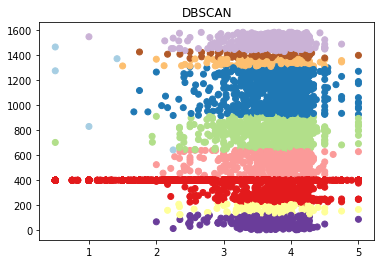

In [41]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=2.3, min_samples=final_movies_ratings_tags.shape[1]+1)
db.fit(X)
y_pred = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")



### Even in DBSCAN there is an overlapping of clusters. In the same way we can reccommend a movie from each cluster using DBSCAN like in K means Clustering .